# Data Exploration about Python Tutorial on FreeCodeCamp Youtube channel

## Short Introduction
#### 1. FreeCodeCamp
FreeCodeCamp is a nonprofit organization that provides free learning courses to help people learn to code for free especially for beginner. 
On youtube, they successfully earned more than 8 million subscribers around the world and posted more than 1541 videos in total. 


#### 2. Python
Lately, Python is gaining popularity among beginners because it is known for being the easiest programming language to learn, especially when compared to other languages. Python is a versatile language that can be used in various areas due to the many open libraries built by the Python community, including web development, game development, software development, and data science.

#### 3. Data Driven, Business and Career
Nowadays, most businesses have started to realize the importance of a data-driven mindset in producing relevant solutions to remain competitive in the market. As a result, careers in data analytics, such as data analyst, data science, and data engineering, have become high-demand professions with attractive salaries, contributing to the popularity of Python. People are starting to seek Python tutorials and bootcamps to secure jobs within the data and analytics industry.

## Aim and Objective
Based on the discussion, Python tutorials have become popular among people aiming to enter the data and analytics market because of the high-demand career opportunities and income potential. This study will focus on topics relevant to Python on FreeCodeCamp. There are three objectives for the study:

1. What is the total number of videos that related to Python
2. Is there any correlation between View Count and video tags, total comments and total like?
3. What is the most popular keyword in video title and description?

## Methodology 
Data Source: Youtube API

Methods: 
1. Data Extraction and Transformation
2. Data Exploration 
3. Word Cloud

Tools:
1. Python
2. Jupyter Notebook

## Acknowledgment
Credit: thu-vu92 (github) & Thu Vu data analytics, @Thuvu5 (youtube)



In [247]:
api_key = '' #Developer Keys

In [248]:
# Currently, Most youtubers has created their own custom URL to replace channel ID. Extra effort has done to get the channel ID through API search method.
channel_ids = ['UC8butISFwT-Wl7EV0hUK0BQ', #Channel ID 
              #more channel
              ]

In [249]:
import os
import pandas as pd # Data Handling
import googleapiclient.discovery
from IPython.display import JSON

import matplotlib.pylab as plt


In [250]:
# NLP libraries
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hpute\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hpute\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [251]:
# Initiate API
os.environ["OAUTHLIB_INSECURE_TRANSPORT"] = "1"

api_service_name = "youtube"
api_version = "v3"

youtube = googleapiclient.discovery.build(
        api_service_name, api_version, developerKey=api_key)

In [252]:
def get_channel_stats(youtube, channel_ids):
    request = youtube.channels().list(
            part="snippet,contentDetails,statistics",
            id="UC8butISFwT-Wl7EV0hUK0BQ",
            maxResults = 10
        )
    response = request.execute()
    return JSON(response)

get_channel_stats(youtube, channel_ids)

<IPython.core.display.JSON object>

There are 34 videos that relevent to Python tutorial published by FreeCodeCamp

In [253]:
def search_video_by_channel(youtube):
    search_video = []
    request = youtube.search().list(
        part="snippet",
        maxResults=50,
        q="freeCodeCamp.org	, tutorial, Full Course, Python", #Search topic
        order = "relevance"
    )
    response = request.execute()
    for index, item in enumerate(response['items']):
        if index > 0 and 'videoId' in item['id']:
            if item['snippet']['channelTitle'] == "freeCodeCamp.org":
                search_video.append(item['id']['videoId'])

    return search_video
    # return JSON(response)

videoByChannel = search_video_by_channel(youtube) #Total Video = 34

In [254]:
def get_video_category(youtube):
    category = []
    request = youtube.videoCategories().list(
        part="snippet",
        regionCode="US"
    )
    response = request.execute()
    for item in response['items']:
        data = {'ID': item['id'],
                'Video Category': item['snippet']['title'],
                }
        category.append(data)

    return pd.DataFrame(category)


video_category = get_video_category(youtube)

In [255]:
def video_stats_info(data):
    dataset = []
    request = youtube.videos().list(
        part="snippet,contentDetails,statistics,recordingDetails",
        id = data
    )
    response = request.execute()
    for item in response['items']:
        data = {
            'Video Id':item['id'],
            'Title': item['snippet']['title'],
            'Channel Title': item['snippet']['channelTitle'],
            'Description': item['snippet']['description'],
            'Video Tags': item['snippet']['tags'] if 'tags' in item['snippet'] else None,
            'Video Category': item['snippet']['categoryId'] if 'categoryId' in item['snippet'] else [],
            'Total Views': item['statistics']['viewCount'],
            'Total Like': item['statistics']['likeCount'],
            'Total Dislike': item['statistics']['dislikeCount'] if 'dislikeCount' in item['statistics'] else 0,
            'Total Comments': item['statistics']['commentCount']
        }

        dataset.append(data)
    return pd.DataFrame(dataset)
    # return JSON(response)
        
video_dataset = video_stats_info(videoByChannel)
video_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Video Id        33 non-null     object
 1   Title           33 non-null     object
 2   Channel Title   33 non-null     object
 3   Description     33 non-null     object
 4   Video Tags      8 non-null      object
 5   Video Category  33 non-null     object
 6   Total Views     33 non-null     object
 7   Total Like      33 non-null     object
 8   Total Dislike   33 non-null     int64 
 9   Total Comments  33 non-null     object
dtypes: int64(1), object(9)
memory usage: 2.7+ KB


Data merging is used to combine all the data into one dataset

In [256]:
new_dataset = pd.merge(video_dataset, video_category, left_on = 'Video Category', right_on = 'ID')
new_dataset.head(3)


,Video Id,Title,Channel Title,Description,Video Tags,Video Category_x,Total Views,Total Like,Total Dislike,Total Comments,ID,Video Category_y
0,rfscVS0vtbw,Learn Python - Full Course for Beginners [Tuto...,freeCodeCamp.org,This course will give you a full introduction ...,"[python, python tutorial, python language, pyt...",27,42340687,1009388,0,43846,27,Education
1,qwAFL1597eM,Python Tutorial for Beginners (with mini-proje...,freeCodeCamp.org,Learn Python programming in this complete cour...,None,27,204511,6612,0,228,27,Education
2,8DvywoWv6fI,Python for Everybody - Full University Python ...,freeCodeCamp.org,This Python 3 tutorial course aims to teach ev...,"[python for everybody, university of michigan,...",27,6419466,177884,0,4693,27,Education


In [257]:
new_dataset['Count tags'] = new_dataset['Video Tags'].apply(lambda x: len(x) if x is not None else 0)
new_dataset['Lenght Title'] = new_dataset['Title'].apply(lambda x: len(x))
new_dataset['Lenght Description'] = new_dataset['Description'].apply(lambda x: len(x))
new_dataset = new_dataset.rename(columns = {'Video Category_y': 'Video Category'})
# new_dataset.drop(['Video Category_x', 'ID'], axis = 1, inplace = True)
new_dataset.head(10)

,Video Id,Title,Channel Title,Description,Video Tags,Video Category_x,Total Views,Total Like,Total Dislike,Total Comments,ID,Video Category,Count tags,Lenght Title,Lenght Description
0,rfscVS0vtbw,Learn Python - Full Course for Beginners [Tuto...,freeCodeCamp.org,This course will give you a full introduction ...,"[python, python tutorial, python language, pyt...",27,42340687,1009388,0,43846,27,Education,14,51,2189
1,qwAFL1597eM,Python Tutorial for Beginners (with mini-proje...,freeCodeCamp.org,Learn Python programming in this complete cour...,None,27,204511,6612,0,228,27,Education,0,50,1513
2,8DvywoWv6fI,Python for Everybody - Full University Python ...,freeCodeCamp.org,This Python 3 tutorial course aims to teach ev...,"[python for everybody, university of michigan,...",27,6419466,177884,0,4693,27,Education,22,52,4831
3,nLRL_NcnK-4,Harvard CS50’s Introduction to Programming wit...,freeCodeCamp.org,Learn Python programming from Harvard Universi...,None,27,2538134,83089,0,1315,27,Education,0,79,3392
4,HGOBQPFzWKo,Intermediate Python Programming Course,freeCodeCamp.org,Take your Python skills to the next level with...,"[python course, python tutorial, python, inter...",27,3323374,75344,0,1772,27,Education,5,38,1408
5,Ej_02ICOIgs,Object Oriented Programming with Python - Full...,freeCodeCamp.org,Object Oriented Programming is an important co...,None,27,1446433,35681,0,1061,27,Education,0,67,999
6,cE3YzKsQvEM,Python Power-Up: Leap Year,freeCodeCamp.org,Learn more about Python programming: https://w...,None,27,65958,2823,0,49,27,Education,0,26,80
7,0sOvCWFmrtA,Python API Development - Comprehensive Course ...,freeCodeCamp.org,Learn Python API development in one of the mos...,None,27,1799187,46844,0,1889,27,Education,0,59,4999
8,jBzwzrDvZ18,Python Backend Web Development Course (with Dj...,freeCodeCamp.org,This video is a full backend web development c...,None,27,1794647,43666,0,958,27,Education,0,51,3058
9,LHBE6Q9XlzI,Python for Data Science - Course for Beginners...,freeCodeCamp.org,This Python data science course will take you ...,"[data science, python, pandas, matplotlib, numpy]",27,3374764,77619,0,1345,27,Education,5,88,1556


In [258]:
columns = ['Total Views', 'Total Like', 'Total Dislike', 'Total Comments']
new_dataset[columns] = new_dataset[columns].apply(pd.to_numeric)
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Video Id            33 non-null     object
 1   Title               33 non-null     object
 2   Channel Title       33 non-null     object
 3   Description         33 non-null     object
 4   Video Tags          8 non-null      object
 5   Video Category_x    33 non-null     object
 6   Total Views         33 non-null     int64 
 7   Total Like          33 non-null     int64 
 8   Total Dislike       33 non-null     int64 
 9   Total Comments      33 non-null     int64 
 10  ID                  33 non-null     object
 11  Video Category      33 non-null     object
 12  Count tags          33 non-null     int64 
 13  Lenght Title        33 non-null     int64 
 14  Lenght Description  33 non-null     int64 
dtypes: int64(7), object(8)
memory usage: 4.0+ KB


## DATA EXPLORATORY AND ANALYSIS

There is no clear correlation between the number of video tags and view count, length title and length description. 
However, relevent keywords in title, description and video tags would help video to reach specific audience. According to Brian Dean (2019), putting too much number of video tags would reduce youtube search algorithm efficiency to understand the content of the video. 

Next, there are relationship between view count and total comments and total like.

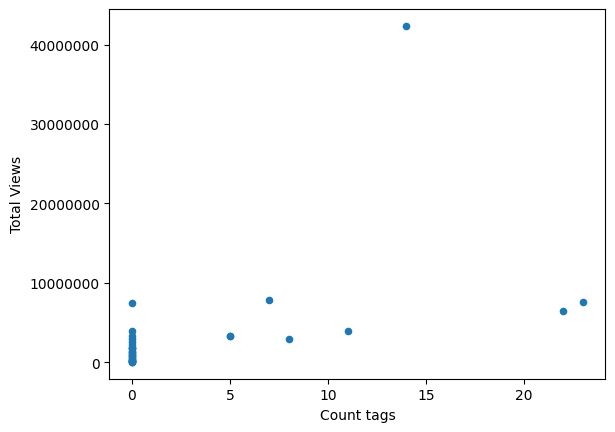

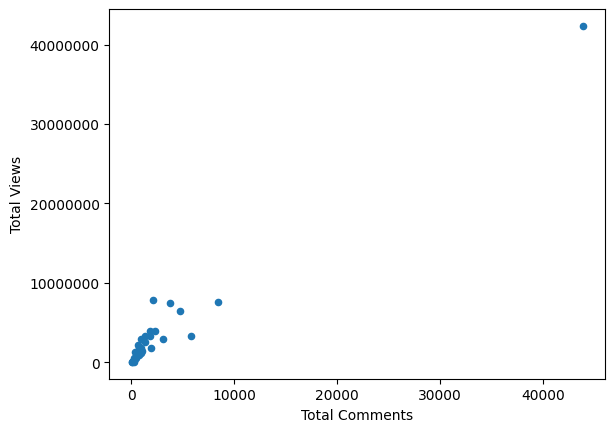

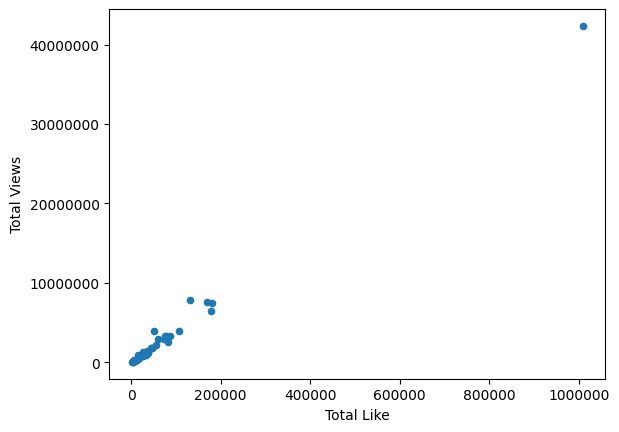

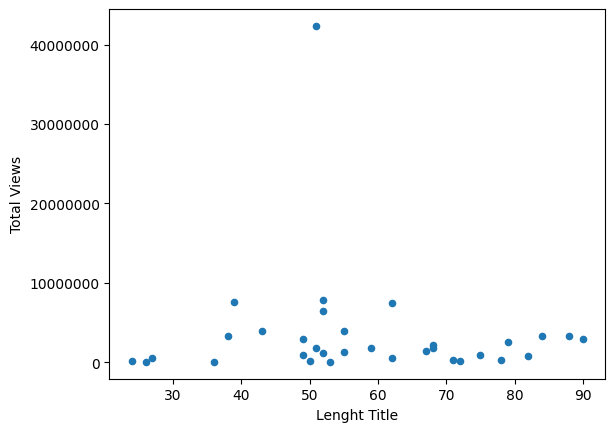

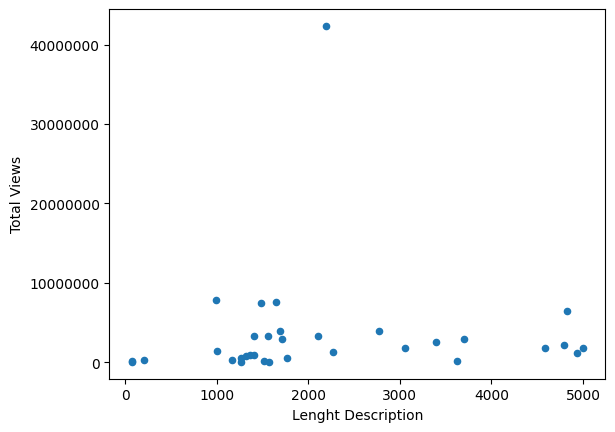

In [259]:
new_dataset.plot.scatter( x = 'Count tags', y = 'Total Views').ticklabel_format(style='plain')
new_dataset.plot.scatter( x = 'Total Comments', y = 'Total Views').ticklabel_format(style='plain')
new_dataset.plot.scatter( x = 'Total Like', y = 'Total Views').ticklabel_format(style='plain')
new_dataset.plot.scatter( x = 'Lenght Title', y = 'Total Views').ticklabel_format(style='plain')
new_dataset.plot.scatter( x = 'Lenght Description', y = 'Total Views').ticklabel_format(style='plain')

### Word Cloud Analysis on Description and Title

In [260]:
dataset_analysis = new_dataset.copy()
dataset_analysis.head(2)

,Video Id,Title,Channel Title,Description,Video Tags,Video Category_x,Total Views,Total Like,Total Dislike,Total Comments,ID,Video Category,Count tags,Lenght Title,Lenght Description
0,rfscVS0vtbw,Learn Python - Full Course for Beginners [Tuto...,freeCodeCamp.org,This course will give you a full introduction ...,"[python, python tutorial, python language, pyt...",27,42340687,1009388,0,43846,27,Education,14,51,2189
1,qwAFL1597eM,Python Tutorial for Beginners (with mini-proje...,freeCodeCamp.org,Learn Python programming in this complete cour...,None,27,204511,6612,0,228,27,Education,0,50,1513


(None, <Axes: xlabel='Word'>)

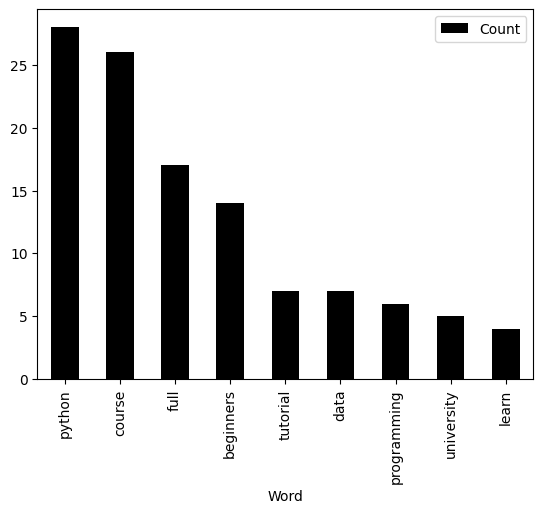

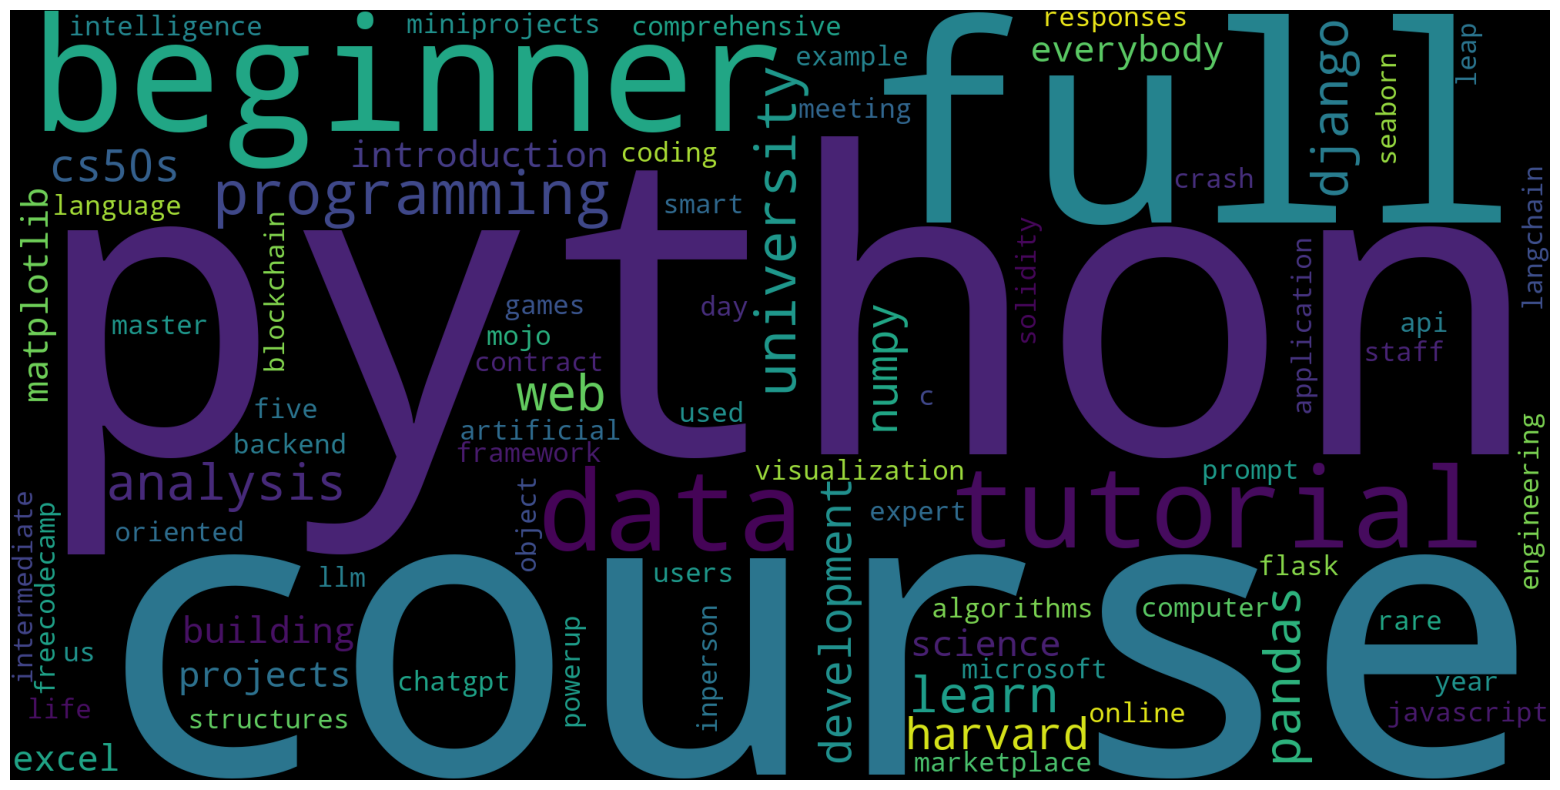

In [261]:
import re
from collections import Counter


# Credit to Thu Vu
def word_cloud_generator(field, max = 10):
    stop_words = set(STOPWORDS)
    dataset_analysis['field to cloud'] = field.apply(lambda x: [re.sub(r'[^\w]', '', item.lower()) for item in str(x).split() if item.lower() not in stop_words])

    all_words = list([a for b in dataset_analysis['field to cloud'].tolist() for a in b])
    all_words_str = ' '.join(all_words)

    # Word count to word cloud
    def plot_cloud(wordcloud):
        plt.figure(figsize=(20, 10))
        plt.imshow(wordcloud) 
        plt.axis("off");

    wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', 
                            colormap='viridis', collocations=False).generate(all_words_str)
    
    # Word count to bar chart
    word_counts = Counter(all_words)

    data_word_count = dict(word_counts.most_common(max))
    data_word_count_df = pd.DataFrame(list(data_word_count.items()), columns=['Word', 'Count'])
    data_word_count_df =  data_word_count_df[data_word_count_df.Word != '']
    data_bar = data_word_count_df.plot.bar(x='Word', y ='Count', color='black')
            
    return plot_cloud(wordcloud), data_bar

word_cloud_generator(new_dataset['Title'])

(None, <Axes: xlabel='Word'>)

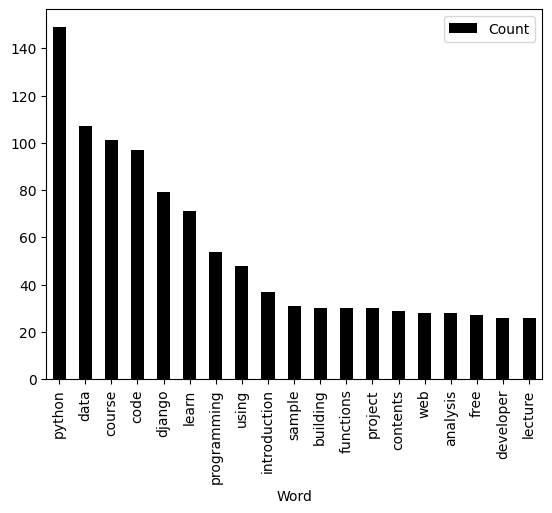

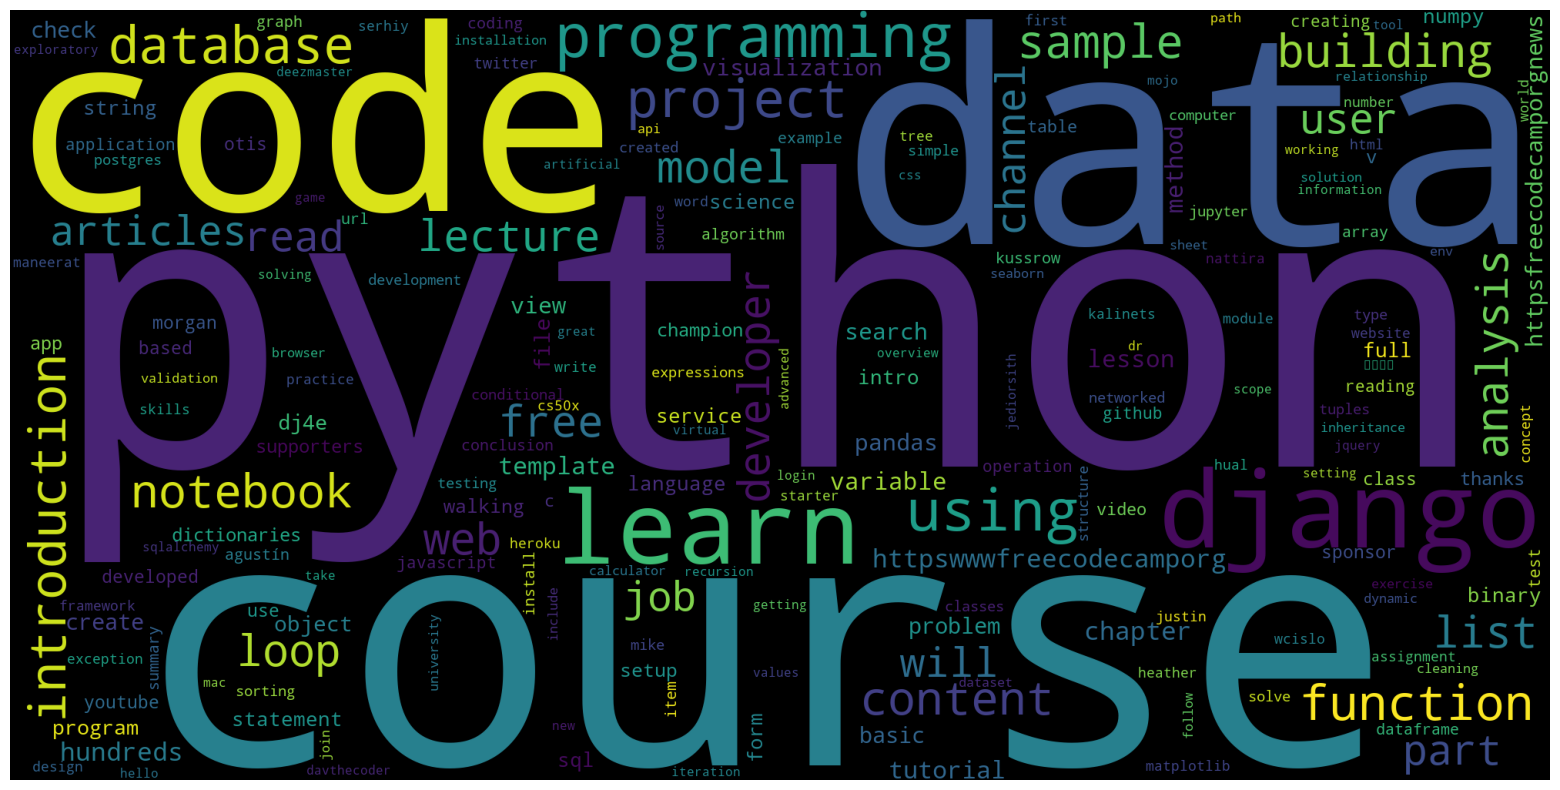

In [262]:
word_cloud_generator(new_dataset['Description'], max = 20)

"Python" is the keyword with the highest count in titles and descriptions because we specifically search for certain topics (freeCodeCamp.org, tutorial, Full Course, Python). If we exclude those from the ranking, we observe that the keyword "beginners" is the most popular in video titles. This indicates that most videos are tailored for beginner audiences. Meanwhile, in the descriptions, the keywords "data," "code," and "django" are used to provide more context about the purpose of the videos.

# Conclusion
34 out of 1541 videos published by FreeCodeCamp are relevent to Python. 
The keyword "beginners" is one of the popular choice to write in the title. 
The number of video tags does not influence the number of viewers but relevent video tags are important to reach specific audiences. An overwhelming quantity of video tags is the worst. 